## Atomic orobitals - 2D plots

#### Requirements | Importing libraries

In [1]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np

#### 1. Describing a radial function $R_{nl}(r)$

$$R_{nl} = \sqrt{ \Big( \frac{2}{n a_0} \Big)^3 \frac{(n-l-1)!}{2n(n+l)!}} \cdot e^{-\frac{r}{n a_0}} \cdot \Big( \frac{2 r}{n a_0} \Big)^l \cdot L^{2l+1}_{n-l-1}\Big( \frac{2 r}{n a_0} \Big)$$

In [3]:
def radial_function(n, 
                    l, 
                    r, 
                    a0):
  '''Rnl(r) normalized radial function'''

    prefactor = np.sqrt( ((2 / n * a0) ** 3 * (np.math.factorial(n - l - 1))) / (2 * n * (np.math.factorial(n + l))) )

    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)

    p = 2 * r / (n * a0)

    return  prefactor * np.exp(-p / 2) * (p ** l) * laguerre(p)

#### 2. Describing an angular function | Spherical harmonic $Y_{l}^{m}(\theta, \varphi)$

$$
Y_{lm}(\phi,\theta) = \sqrt{\frac{2l+1}{4\pi} \frac{(l-m)!}{(l+m)!} } P_{lm}(cos \phi) \cdot e^{im\theta}
$$

In [4]:
def angular_function(m, 
                     l, 
                     theta, 
                     phi):
                     
    '''Ylm(θ,φ) normalized angular function'''

    legendre = sp.lpmv(m, l, np.cos(theta))

    prefactor = ((-1) ** m) * np.sqrt( ( (2 * l + 1) * np.math.factorial(l - np.abs(m)) )
                                      / (4 * np.pi * np.math.factorial(l + np.abs(m)))
                                      )

    return  prefactor * legendre * np.real(np.exp(1.j * m * phi))

#### 3. Describing the normalized probability as wavefunction squared $|\psi _{nlm}(r,\theta ,\varphi)|^2$ 

$$\psi_{nlm} = R_{nl}(r) \cdot Y_{l}^{m}(\theta, \varphi)$$

In [5]:
def normalized_wavefunction(n, 
                            l, 
                            m, 
                            a0=0.6):

    '''Ψnlm(r,θ,φ) normalized wavefunction
    by definition of quantum numbers n, l, m and a bohr radius augmentation coefficient'''
    a0 = 5.29e-11 * (1e+12 * a0)

    # Set coordinates grid to assign a certain probability to each point (x, y) in the plane
    x = y = np.linspace(-480, 480, 680)
    x, y = np.meshgrid(x, y)

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(n, l, np.sqrt((x ** 2 + y ** 2)), a0) * angular_function(m, l, np.arctan(x / (y + 1e-10)), 0)

    return np.abs(psi) ** 2

#### 4. Plotting wavefunction electron probability density plots

In [6]:
def plot_wavefunction(n, 
                      l, 
                      m, 
                      a0=0.6):

    fig, ax = plt.subplots()
    im = ax.imshow(np.sqrt(normalized_wavefunction(n, l, m, a0)), cmap='rocket')

    # Add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])

    # Apply dark palette 
    fig.patch.set_facecolor('#020419'); cbar.outline.set_visible(False)
    plt.rcParams['text.color']='#dfdfdf'; ax.tick_params(axis='x', colors='#c4c4c4')
    ax.tick_params(axis='y', colors='#c4c4c4')

    ax.spines['top'].set_color('#020419'); ax.spines['right'].set_color('#020419')
    ax.spines['bottom'].set_color('#c4c4c4'); ax.spines['left'].set_color('#c4c4c4')
    ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#dfdfdf')


    # Add text and labels
    ax.invert_yaxis()
    ax.text(40, 630, r'$\psi_{{({0}, {1}, {2})}}$'.format(n, l, m), color='#dfdfdf', fontsize=18)
    ax.text(780, 140, 'Particle probability distribution', rotation='vertical', fontsize=13)
    ax.text(780, 660, '+', fontsize=16)
    ax.text(780, 0, '−', fontsize=16)

    # Save plot
    plt.savefig(f'wavefunction ({n},{l},{m}).png', dpi=245, bbox_inches='tight', pad_inches=0.3)

###  Implementation | Output:

Light shaded areas in the orbital cross-sections represent a high probability of a particle being present in that region.

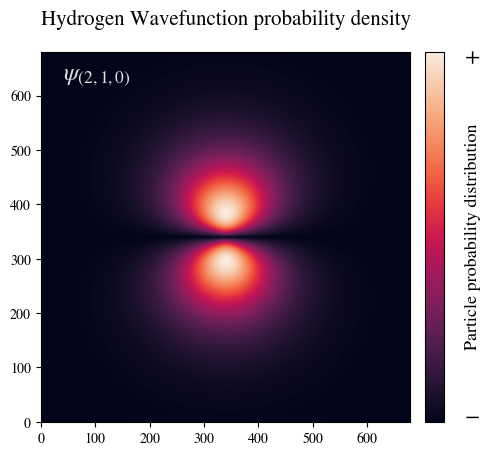

In [9]:
plot_wavefunction(n=2, 
                  l=1, 
                  m=0)  

### Interactive plot

In [ ]:
import holoviews as hv 

hv.extension('plotly')

psi = np.sqrt(normalized_wavefunction(n=1, l=0, m=0, a0=0.6))

img = hv.Image( psi )

img